In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import string
from gensim.models import Word2Vec


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Loading Data

In [15]:
df = pd.read_csv("D:/AIN423 PROJECT/Training_Essay_Data.csv")
df1 = pd.read_csv("D:/AIN423 PROJECT/train_drcat_01.csv")
df2 = pd.read_csv("D:/AIN423 PROJECT/train_drcat_02.csv")
df3 = pd.read_csv("D:/AIN423 PROJECT/train_drcat_03.csv")
df4 = pd.read_csv("D:/AIN423 PROJECT/train_drcat_04.csv")

In [16]:
df.rename(columns = {'generated':'label'}, inplace = True)
df

,text,label
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1
...,...,...
29140,There has been a fuss about the Elector Colleg...,0
29141,Limiting car usage has many advantages. Such a...,0
29142,There's a new trend that has been developing f...,0
29143,As we all know cars are a big part of our soci...,0


In [17]:
df1 = df1.drop(columns = ["source", "fold"])
df1

,text,label
0,There are alot reasons to keep our the despise...,0
1,Driving smart cars that drive by themself has ...,0
2,"Dear Principal,\n\nI believe that students at ...",0
3,"Dear Principal,\n\nCommunity service should no...",0
4,My argument for the development of the driverl...,0
...,...,...
33254,Are driverless cars really necessary? Most of ...,0
33255,"""Oh man I didn't make the soccer team!"", yelle...",0
33256,I believe that using this technology could be ...,0
33257,Texting & Driving\n\nUsing your phone while dr...,0


In [18]:
df2 = df2.drop(columns = ["source", "fold", "essay_id", "prompt"])
df2

,text,label
0,"Okay, here is my essay:\n\nWorking or doing th...",1
1,"Dear Principal,\r\n\r\nI just want to let you ...",0
2,I believe they should change the voting to pop...,0
3,One example of an inspiring individual who has...,1
4,"Dear Mr. Principal,\n\nI believe that students...",0
...,...,...
39780,"""Oh man I didn't make the soccer team!"", yelle...",0
39781,I believe that using this technology could be ...,0
39782,The Face on Mars is a fascinating phenomenon t...,1
39783,Texting & Driving\n\nUsing your phone while dr...,0


In [19]:
df3 = df3.drop(columns = ["source", "fold", "essay_id", "prompt"])
df3

,text,label
0,People can learn without making mistakes. Peop...,0
1,PHONES AND DRIVING\n\nIn this world in which w...,0
2,"Okay, here's my essay:\n\nMaking Your Own Deci...",1
3,Dear : Principal\n\nI believe that allowing s...,1
4,Well for one if you seek more then one person ...,0
...,...,...
42201,"""Oh man I didn't make the soccer team!"", yelle...",0
42202,I believe that using this technology could be ...,0
42203,The Face on Mars is a fascinating phenomenon t...,1
42204,Texting & Driving\n\nUsing your phone while dr...,0


In [20]:
df4 = df4.drop(columns = ["source", "fold", "essay_id", "prompt"])
df4

,text,label
0,"In recent years, technology has had a profoun...",1
1,Should students participate in an extracurricu...,0
2,The electoral college is a symbol of mockery a...,0
3,This is why I think the principle should allow...,0
4,I strongly believe that meditation and mindful...,1
...,...,...
44201,"""Oh man I didn't make the soccer team!"", yelle...",0
44202,I believe that using this technology could be ...,0
44203,The Face on Mars is a fascinating phenomenon t...,1
44204,Texting & Driving\n\nUsing your phone while dr...,0


In [22]:
df = pd.concat([df,df1, df2, df3, df4], ignore_index=True)
df

,text,label
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1
...,...,...
188596,"""Oh man I didn't make the soccer team!"", yelle...",0
188597,I believe that using this technology could be ...,0
188598,The Face on Mars is a fascinating phenomenon t...,1
188599,Texting & Driving\n\nUsing your phone while dr...,0


#### NaN Check

In [23]:
nan_counts = df.isna().sum()
nan_counts

text     0
label    0
dtype: int64

#### Turning every word into lowercase

In [24]:
def lowercase_words(cell):
    return ' '.join(word.lower() for word in cell.split())

# Applying the function to the DataFrame
df['text'] = df['text'].apply(lowercase_words)
df

,text,label
0,car-free cities have become a subject of incre...,1
1,"car free cities car-free cities, a concept gai...",1
2,a sustainable urban future car-free cities are...,1
3,pioneering sustainable urban living in an era ...,1
4,the path to sustainable urban living in an age...,1
...,...,...
188596,"""oh man i didn't make the soccer team!"", yelle...",0
188597,i believe that using this technology could be ...,0
188598,the face on mars is a fascinating phenomenon t...,1
188599,texting & driving using your phone while drivi...,0


#### Removing punctuation and special characters

In [25]:
def remove_punctuation(cell):
    return ''.join(char for char in cell if char not in string.punctuation)

# Applying the function to the DataFrame
df['text'] = df['text'].apply(remove_punctuation)
df

,text,label
0,carfree cities have become a subject of increa...,1
1,car free cities carfree cities a concept gaini...,1
2,a sustainable urban future carfree cities are ...,1
3,pioneering sustainable urban living in an era ...,1
4,the path to sustainable urban living in an age...,1
...,...,...
188596,oh man i didnt make the soccer team yelled gen...,0
188597,i believe that using this technology could be ...,0
188598,the face on mars is a fascinating phenomenon t...,1
188599,texting driving using your phone while drivin...,0


#### Tokenization

In [26]:
def tokenize(cell):
    return word_tokenize(cell)
df['Tokenized_text'] = df['text'].apply(tokenize)
df

,text,label,Tokenized_text
0,carfree cities have become a subject of increa...,1,"[carfree, cities, have, become, a, subject, of..."
1,car free cities carfree cities a concept gaini...,1,"[car, free, cities, carfree, cities, a, concep..."
2,a sustainable urban future carfree cities are ...,1,"[a, sustainable, urban, future, carfree, citie..."
3,pioneering sustainable urban living in an era ...,1,"[pioneering, sustainable, urban, living, in, a..."
4,the path to sustainable urban living in an age...,1,"[the, path, to, sustainable, urban, living, in..."
...,...,...,...
188596,oh man i didnt make the soccer team yelled gen...,0,"[oh, man, i, didnt, make, the, soccer, team, y..."
188597,i believe that using this technology could be ...,0,"[i, believe, that, using, this, technology, co..."
188598,the face on mars is a fascinating phenomenon t...,1,"[the, face, on, mars, is, a, fascinating, phen..."
188599,texting driving using your phone while drivin...,0,"[texting, driving, using, your, phone, while, ..."


#### Lemmatization

In [27]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun if tag not found

tagged_tokens = nltk.pos_tag_sents(df['Tokenized_text'].tolist())
tagged_tokens = [tagged_token for sublist in tagged_tokens for tagged_token in sublist]  # flatten the list of lists

# Lemmatization with POS tagging
lemmatizer = WordNetLemmatizer()

def lemmatize_with_pos(token, tag):
    wn_tag = get_wordnet_pos(tag)
    if wn_tag is None:
        return token
    else:
        return lemmatizer.lemmatize(token, pos=wn_tag)

df['Lemmatized_tokens'] = df['Tokenized_text'].apply(lambda x: [lemmatize_with_pos(token, tag) for token, tag in nltk.pos_tag(x)])
df

,text,label,Tokenized_text,Lemmatized_tokens
0,carfree cities have become a subject of increa...,1,"[carfree, cities, have, become, a, subject, of...","[carfree, city, have, become, a, subject, of, ..."
1,car free cities carfree cities a concept gaini...,1,"[car, free, cities, carfree, cities, a, concep...","[car, free, city, carfree, city, a, concept, g..."
2,a sustainable urban future carfree cities are ...,1,"[a, sustainable, urban, future, carfree, citie...","[a, sustainable, urban, future, carfree, city,..."
3,pioneering sustainable urban living in an era ...,1,"[pioneering, sustainable, urban, living, in, a...","[pioneer, sustainable, urban, living, in, an, ..."
4,the path to sustainable urban living in an age...,1,"[the, path, to, sustainable, urban, living, in...","[the, path, to, sustainable, urban, living, in..."
...,...,...,...,...
188596,oh man i didnt make the soccer team yelled gen...,0,"[oh, man, i, didnt, make, the, soccer, team, y...","[oh, man, i, didnt, make, the, soccer, team, y..."
188597,i believe that using this technology could be ...,0,"[i, believe, that, using, this, technology, co...","[i, believe, that, use, this, technology, coul..."
188598,the face on mars is a fascinating phenomenon t...,1,"[the, face, on, mars, is, a, fascinating, phen...","[the, face, on, mar, be, a, fascinating, pheno..."
188599,texting driving using your phone while drivin...,0,"[texting, driving, using, your, phone, while, ...","[texting, drive, use, your, phone, while, driv..."


#### Word2vec Encoding

In [28]:
# Train Word2Vec model (you can use pre-trained embeddings as well)
word2vec_model = Word2Vec(df['Lemmatized_tokens'], min_count=1)

# Get word vectors
word_vectors = word2vec_model.wv

# Convert documents to average word vectors
word_embeddings = []
for tokens in df['Lemmatized_tokens']:
    vectors = [word_vectors[word] for word in tokens if word in word_vectors]
    if vectors:
        word_embeddings.append(sum(vectors) / len(vectors))
    else:
        word_embeddings.append([0] * word2vec_model.vector_size)  # Placeholder for empty documents

# Convert list of vectors to numpy array
word_embeddings_array = np.array(word_embeddings)

In [29]:
word_embeddings_array.shape

(188601, 100)

In [30]:
embeddings_df = pd.DataFrame(word_embeddings_array)

# Concatenate with labels
final_df = pd.concat([embeddings_df, df['label']], axis=1)
final_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.026323,-0.423879,-0.233856,0.169099,0.098510,0.572150,0.547484,-0.604549,-0.310343,0.839619,...,-0.293638,0.596970,-1.102298,-0.268800,-0.406836,0.080411,-0.089030,0.013212,0.336394,1
1,0.096389,-0.382767,-0.224965,0.188931,0.170946,0.627378,0.568295,-0.670851,-0.253065,0.877723,...,-0.405583,0.539302,-1.076797,-0.178168,-0.433079,0.077263,-0.123602,0.042472,0.428737,1
2,-0.071557,-0.387535,-0.084430,0.183777,0.203162,0.587974,0.561250,-0.702809,-0.246589,0.960553,...,-0.323997,0.701689,-0.959221,-0.098704,-0.335367,0.144279,-0.227768,-0.008659,0.367578,1
3,0.057666,-0.483632,-0.166700,0.265390,0.061186,0.632043,0.499849,-0.686019,-0.244426,0.837081,...,-0.337490,0.612599,-1.028485,-0.197907,-0.342227,0.114696,-0.187548,-0.035044,0.289027,1
4,0.004802,-0.520016,-0.146324,0.231966,0.115506,0.611523,0.464643,-0.652437,-0.272317,0.889240,...,-0.348503,0.622379,-1.067507,-0.256876,-0.392799,0.189766,-0.081298,0.011021,0.311833,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188596,-0.538525,-0.705543,0.305303,-0.107724,-1.049587,-0.477963,-1.069992,-0.563653,1.282286,-0.140591,...,-0.298116,0.802211,0.583188,0.587576,-0.420168,-1.192193,0.553825,-0.291229,-0.508360,0
188597,0.071615,-0.466893,0.521602,-0.431708,-0.597613,0.198136,-0.216778,0.190368,0.824128,0.152340,...,0.555915,0.714408,0.744513,1.095875,-0.172705,0.013662,0.301638,0.067015,-0.500025,0
188598,0.331217,-0.724533,0.598391,0.100319,-0.636785,0.608712,-0.102696,-0.361660,0.297105,0.472889,...,0.821902,0.736822,0.232463,-0.012867,-0.236677,0.020399,-0.154140,-0.062965,-0.826824,1
188599,0.196445,-1.024434,0.039840,0.338258,-0.969911,-0.652595,-0.644825,-0.088582,0.555717,-0.717696,...,0.045236,-0.330542,0.298133,0.554054,-0.360302,-0.551790,0.327563,-0.341806,0.727882,0


#### Modelling

In [31]:
from sklearn.model_selection import train_test_split

# Split dataset into features (embeddings) and target labels
X = final_df.drop('label', axis=1)
y = final_df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
from sklearn.linear_model import LogisticRegression


# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [33]:
from sklearn.metrics import classification_report

# Predict on testing set
y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     26577
           1       0.97      0.95      0.96     11144

    accuracy                           0.98     37721
   macro avg       0.97      0.97      0.97     37721
weighted avg       0.98      0.98      0.98     37721



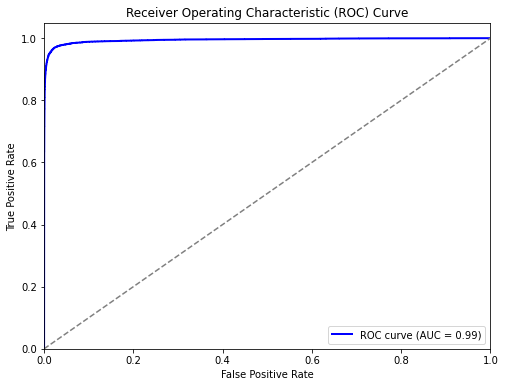

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained your model and obtained predicted probabilities on the test set
# y_pred_probs should contain the predicted probabilities for the positive class (1)
y_pred_probs = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr) and true positive rate (tpr) for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [35]:
import joblib

# Specify the path where you want to save the model
model_path = 'D:/AIN423 PROJECT/model.pkl'

# Save the model to the specified path
joblib.dump(model, model_path)

['D:/AIN423 PROJECT/model.pkl']